# K-neighbors Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

## Load Data

In [2]:
data = pd.read_csv('../Datasets/kitsune_dataset/SSDP_Flood/SSDP_Flood_dataset.csv', index_col=0, dtype=np.float32)
labels = pd.read_csv('../Datasets/kitsune_dataset/SSDP_Flood/SSDP_Flood_labels.csv', index_col=0, dtype=np.int32)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4077265 entries, 1.997161626815796 to 7431.08154296875
Columns: 114 entries, 2.090000000000000000e+02 to 0.000000000000000000e+00.54
dtypes: float32(114)
memory usage: 1.8 GB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4077266 entries, 1 to 4077266
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   x       int32
dtypes: int32(1)
memory usage: 46.7 MB


## Scale Data

In [5]:
scaler = pp.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
count,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,...,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06,4.077265e+06
mean,3.580238e-01,4.671063e-01,3.508413e-01,3.598694e-01,4.700377e-01,3.433883e-01,3.637087e-01,4.703622e-01,2.782625e-01,3.665047e-01,...,5.643966e-02,8.208480e-07,4.581425e-05,4.522811e-01,3.587175e-01,1.577588e-01,4.086633e-01,7.277953e-02,1.597313e-06,2.253427e-06
std,2.957265e-01,4.621330e-01,4.630089e-01,2.969780e-01,4.643876e-01,4.560021e-01,2.998802e-01,4.641721e-01,3.923702e-01,3.017395e-01,...,7.771327e-02,6.856606e-04,1.123364e-03,3.869117e-01,4.293905e-01,2.030867e-01,4.402577e-01,9.345526e-02,1.099273e-03,1.129677e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.492007e-02,2.417709e-16,8.583670e-03,5.516712e-02,3.243613e-16,7.681936e-03,5.571285e-02,8.520296e-16,7.668835e-03,5.607574e-02,...,7.958050e-18,1.599765e-11,4.424648e-05,4.893123e-04,5.467626e-02,3.218412e-09,5.467626e-02,1.035818e-17,4.792328e-14,6.285793e-07
50%,4.703829e-01,1.532744e-01,1.492918e-02,4.750757e-01,1.416185e-01,1.506229e-02,4.827601e-01,1.251880e-01,1.569101e-02,4.872446e-01,...,1.629809e-14,1.599765e-11,4.424648e-05,4.705715e-01,7.331443e-02,1.994377e-07,1.004644e-01,6.629234e-14,4.792328e-14,6.285793e-07
75%,4.916134e-01,9.532721e-01,9.878299e-01,4.932150e-01,9.614484e-01,9.880919e-01,4.973904e-01,9.645034e-01,7.077904e-01,5.011610e-01,...,1.002747e-01,1.599765e-11,4.424648e-05,8.454109e-01,9.649540e-01,3.570667e-01,9.666380e-01,1.293227e-01,4.792328e-14,6.285793e-07
max,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,...,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Train-Test Split

In [6]:
# drop the last row
labels=labels[:-1]
labels.tail(5)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=False, test_size=0.3)

In [7]:
# anomaly counts
print(f'Number anomalies in train data: {y_train.sum()}')
print(f'Number anomalies in test data: {y_test.sum()}')

Number anomalies in train data: x    229441
dtype: int64
Number anomalies in test data: x    1210162
dtype: int64


## Create Model

In [ ]:
model = LocalOutlierFactor(n_neighbors=23)
model.fit(X_train)

## Evaluate

In [11]:
predictions = model.predict(X_test)

In [29]:
# convert to 0-1
predictions = [0 if x>0 else 1 for x in predictions] 

In [31]:
# average precision score train
aps_test = average_precision_score(y_test, predictions)
print(f'Average precision score for test: {aps_test:.4f}')

Average precision score for test: 0.9894


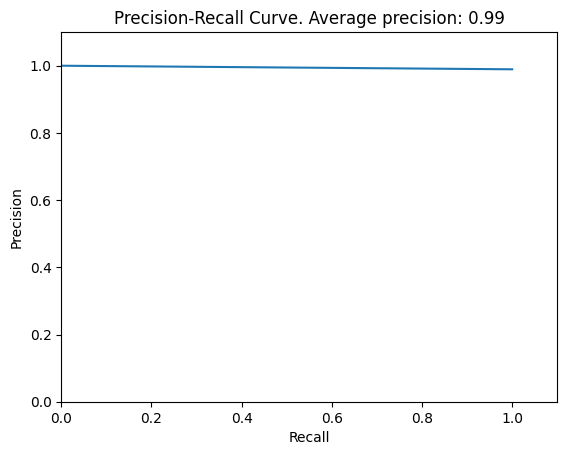

In [17]:
# precision-recall curve for test results
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.title(f'Precision-Recall Curve. Average precision: {aps_test:.2f}')
plt.xlabel('Recall')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
#plt.ylim([0, 1.1])
#plt.xlim([0, 1.0])
plt.plot(recall, precision)
plt.show()

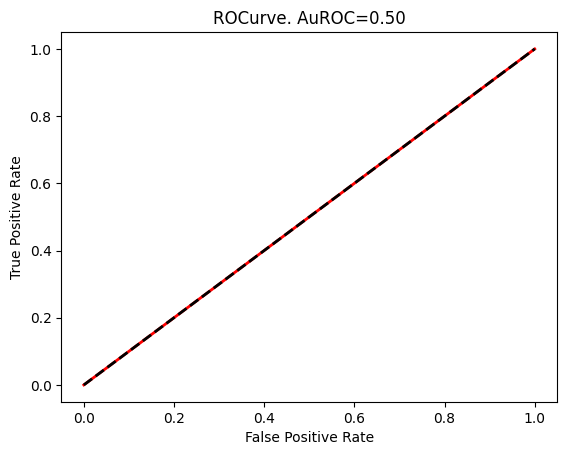

In [32]:
# receiver operational characteristic
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auROC = auc(fpr, tpr)
plt.figure()
plt.title(f'ROCurve. AuROC={auROC:.2f}')
plt.plot(fpr, tpr, color='r', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], color='k', lw=2, linestyle='--')
plt.show()